<h1><center> Data Management & Visualization of Seattle Area Airbnb data</center></h1>

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sys

### Loading and cleaning data

In [2]:
df = pd.read_csv('seattle_01.csv')
df

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,7970,30976187,231435350,Entire home/apt,"Seattle, WA, United States",0,NaN,4,1.0,1.0,78,2018-12-20 03:56:11.441877,47.611444,-122.330790,0101000020E610000001F6D1A92B955EC0EFAA07CC43CE...,Lovely Downtown Condo WS 97 (Includes Parking),USD,nightly
7572,7971,30982022,215426444,Private room,"Seattle, WA, United States",0,NaN,3,1.0,1.0,34,2018-12-20 03:42:51.04026,47.575621,-122.297958,0101000020E610000038656EBE11935EC006F2ECF2ADC9...,2 Beds&Bath Free Parking& LR STA Airport DT UW...,USD,nightly
7573,7972,30994069,230457966,Entire home/apt,"Seattle, WA, United States",0,NaN,2,1.0,1.0,80,2018-12-20 03:19:17.810312,47.621749,-122.326110,0101000020E610000082397AFCDE945EC00DA9A27895CF...,Vintage Private Courtyard Apartment,USD,nightly
7574,7973,30998202,48005494,Entire home/apt,"Washington, WA, United States",0,NaN,4,2.0,2.0,129,2018-12-20 03:26:52.53791,47.624673,-122.336345,0101000020E610000014CB2DAD86955EC0DCD8EC48F5CF...,2BR Apartment,USD,nightly


In [3]:
df.dropna(how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
# See data types per column
df.dtypes

Unnamed: 0                int64
room_id                   int64
host_id                   int64
room_type                object
address                  object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
bathrooms               float64
price                     int64
last_modified            object
latitude                float64
longitude               float64
location                 object
name                     object
currency                 object
rate_type                object
dtype: object

In [5]:
# Check unique data to see if we can drop column
print('{:20} : number of unique values'.format("Column"))
for column in list(df.columns.values):
    print('{:20} : {}'.format(column, len(df[column].unique())))

Column               : number of unique values
Unnamed: 0           : 6101
room_id              : 6101
host_id              : 3829
room_type            : 3
address              : 23
reviews              : 343
overall_satisfaction : 6
accommodates         : 20
bedrooms             : 9
bathrooms            : 13
price                : 315
last_modified        : 6101
latitude             : 5741
longitude            : 5736
location             : 5889
name                 : 6001
currency             : 1
rate_type            : 1


In [6]:
# Drop columns that's not significant
df.drop(['Unnamed: 0', 'last_modified', 'location', 'currency', 'rate_type'], axis=1, inplace=True)

In [7]:
# Change column name for better representation
# name to room_name
# address to location
# overral_satisfaction to rating
df.rename(columns={'name' : 'room_name', 'address' : 'location', 'overall_satisfaction' : 'rating'}, inplace=True)

In [8]:
# Check city name and organize
print(df.location.unique())

['Seattle, WA, United States' 'Kirkland, WA, United States'
 'Bellevue, WA, United States' 'Redmond, WA, United States' 'Seattle, WA'
 'Mercer Island, WA, United States' 'Renton, WA, United States'
 'Ballard, Seattle, WA, United States' 'West Seattle, WA, United States'
 'Medina, WA, United States' '西雅图, WA, United States'
 'Newcastle, WA, United States' 'Seattle , WA, United States'
 'Ballard Seattle, WA, United States' 'Yarrow Point, WA, United States'
 'Clyde Hill, WA, United States' 'Tukwila, WA, United States'
 'Seattle, Washington, US, WA, United States'
 'Capitol Hill, Seattle, WA, United States' 'Kirkland , Wa, United States'
 'Hunts Point, WA, United States' 'Seattle, DC, United States'
 'Seattle, United States']


In [9]:
# Dropped Seattle, DC
index = int(df[df['location']=='Seattle, DC, United States'].index[0])
df.drop(df.index[index], inplace=True)

In [10]:
# Replace all Seattle address to just 'Seattle, WA'
# 西雅图 is Seattle in mandarin
df1 = df[df['location'].str.contains('Seattle')]
df.replace(df1['location'].unique(), 'Seattle, WA, United States', inplace=True)
df.replace('西雅图, WA, United States', 'Seattle, WA, United States', inplace=True)

In [11]:
# Replace all Kirkland address to just 'Kirkland, WA'
df2 = df[df['location'].str.contains('Kirkland')]
df.replace(df2['location'].unique(), 'Kirkland, WA, United States', inplace=True)

### Save data to database

In [12]:
conn = sqlite3.connect(r'C:\Users\steph\Documents\Projects\TMAC\seattle_airbnb.db')
df.to_sql('listings', conn, if_exists='replace', index=False)

In [13]:
df = pd.read_sql('SELECT * FROM listings', conn)
df.head()

,room_id,host_id,room_type,location,reviews,rating,accommodates,bedrooms,bathrooms,price,latitude,longitude,room_name
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,47.610819,-122.290816,"Casa Madrona - Urban Oasis, 1 block from the P..."
1,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,47.687801,-122.313427,Sunrise in Seattle Master Suite
2,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,47.523980,-122.359891,"Cozy Studio, min. to downtown -WiFi"
3,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,47.654109,-122.337605,"Fab, private seattle urban cottage!"
4,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,47.550167,-122.319366,Glorious sun room w/ memory foambed


### Data Exploration & Visualization
#### 1) Listing count per location per room type
Shows listing count in Seattle and surrounding area according to its room type.

In [14]:
df_rooms = pd.read_sql('SELECT location, room_type, room_id, accommodates, price FROM listings WHERE accommodates < 20 and price < 1000;', conn)

df_entire = df_rooms[df_rooms['room_type'] == 'Entire home/apt']
df_private = df_rooms[df_rooms['room_type'] == 'Private room']
df_shared = df_rooms[df_rooms['room_type'] == 'Shared room']

In [15]:
def plot_3_graphs(df):
    fig, axs = plt.subplots(ncols=3, figsize=(45,10))

    ax1 = df[0].plot(ax=axs[0], kind='bar', legend=False, color='tomato')
    ax1.set_xticklabels([l[:len(l)-19] for l in df[0]['location']], size=15, rotation=45)
    ax1.set_title('Entire home/apt', size=25)
    ax1.set_xlabel('Location', size=20)
    ax1.set_ylabel('Listing Count', size=20)

    ax2 = df[1].plot(ax=axs[1], kind='bar', legend=False, color='dodgerblue')
    ax2.set_xticklabels([l[:len(l)-19] for l in df[1]['location']], size=15, rotation=45)
    ax2.set_title('Private room', size=25)
    ax2.set_xlabel('Location', size=20)
    ax2.set_ylabel('Listing Count', size=20)

    ax3 = df[2].plot(ax=axs[2], kind='bar', legend=False, color='gold')
    ax3.set_xticklabels([l[:len(l)-19] for l in df[2]['location']], size=15, rotation=45)
    ax3.set_title('Shared room', size=25)
    ax3.set_xlabel('Location', size=20)
    ax3.set_ylabel('Listing Count', size=20)
    plt.yticks(fontsize=20)
    plt.show()
    
def get_count_df(df):
    df_temp = df.groupby('location').count()
    df_temp = pd.DataFrame({'location' : list(df_temp.index), 'count' : list(df_temp['room_id'])})
    return df_temp

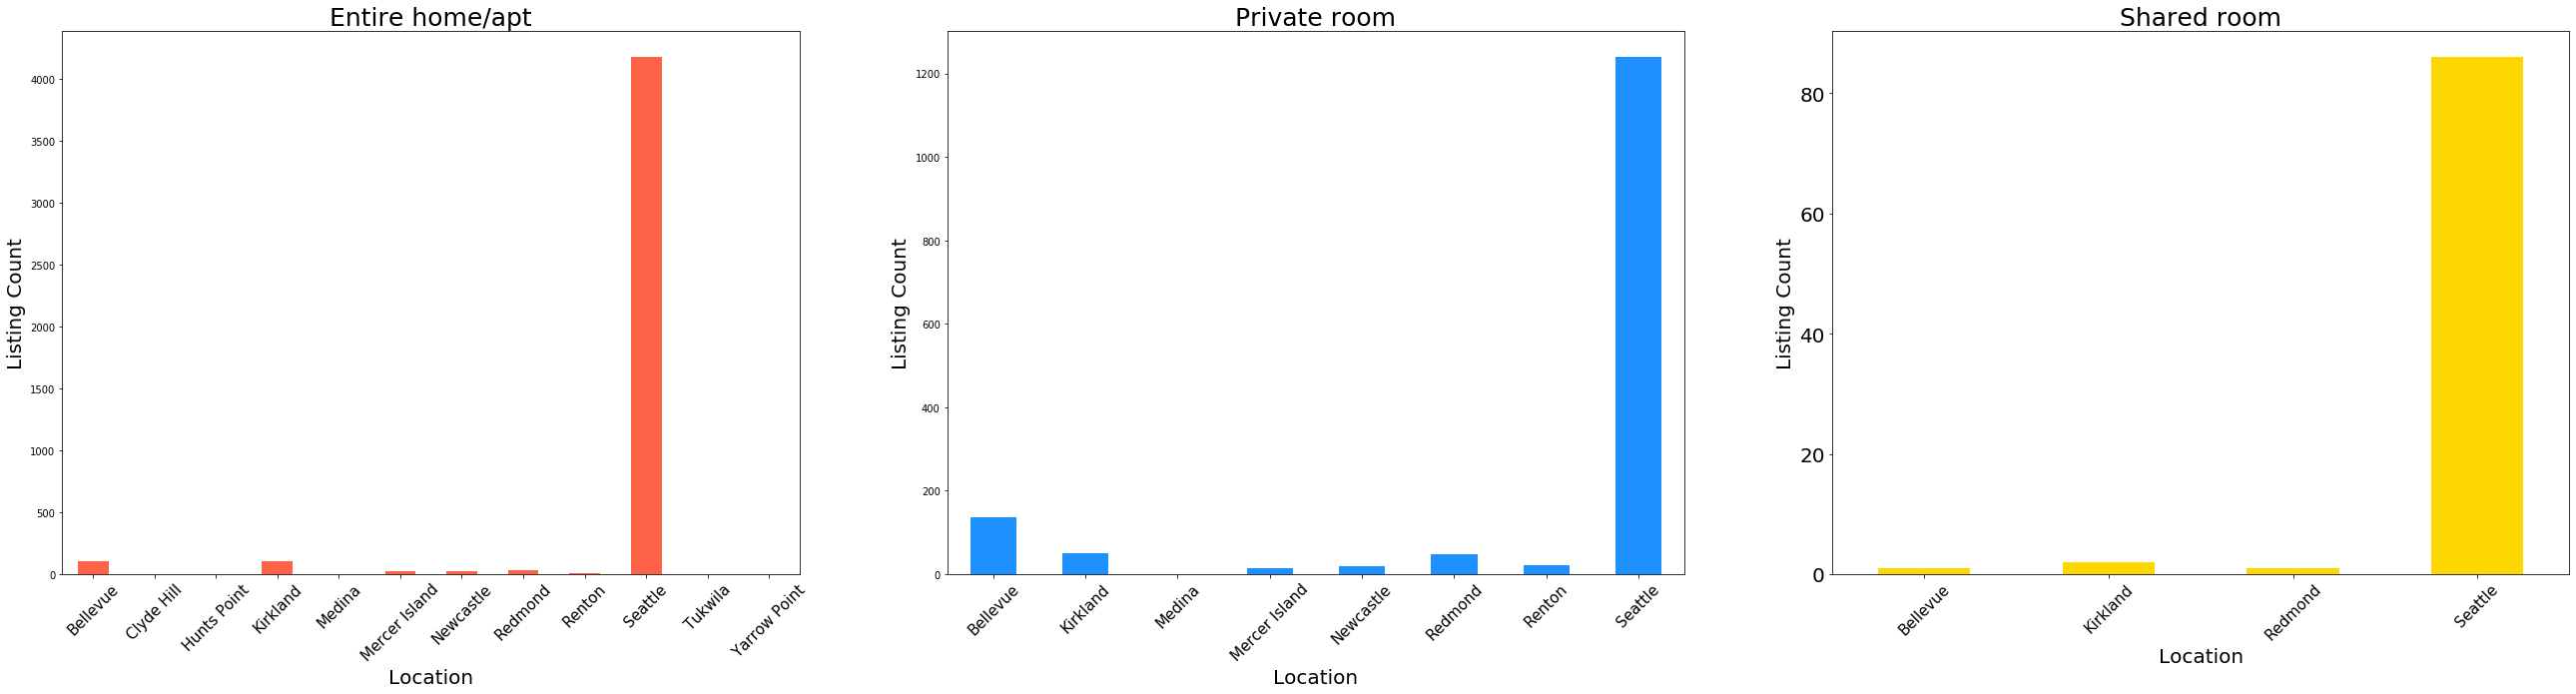

In [16]:
df_entire_count = get_count_df(df_entire)
df_private_count = get_count_df(df_private)
df_shared_count = get_count_df(df_shared)
df_rooms = [df_entire_count, df_private_count, df_shared_count]

plot_3_graphs(df_rooms)

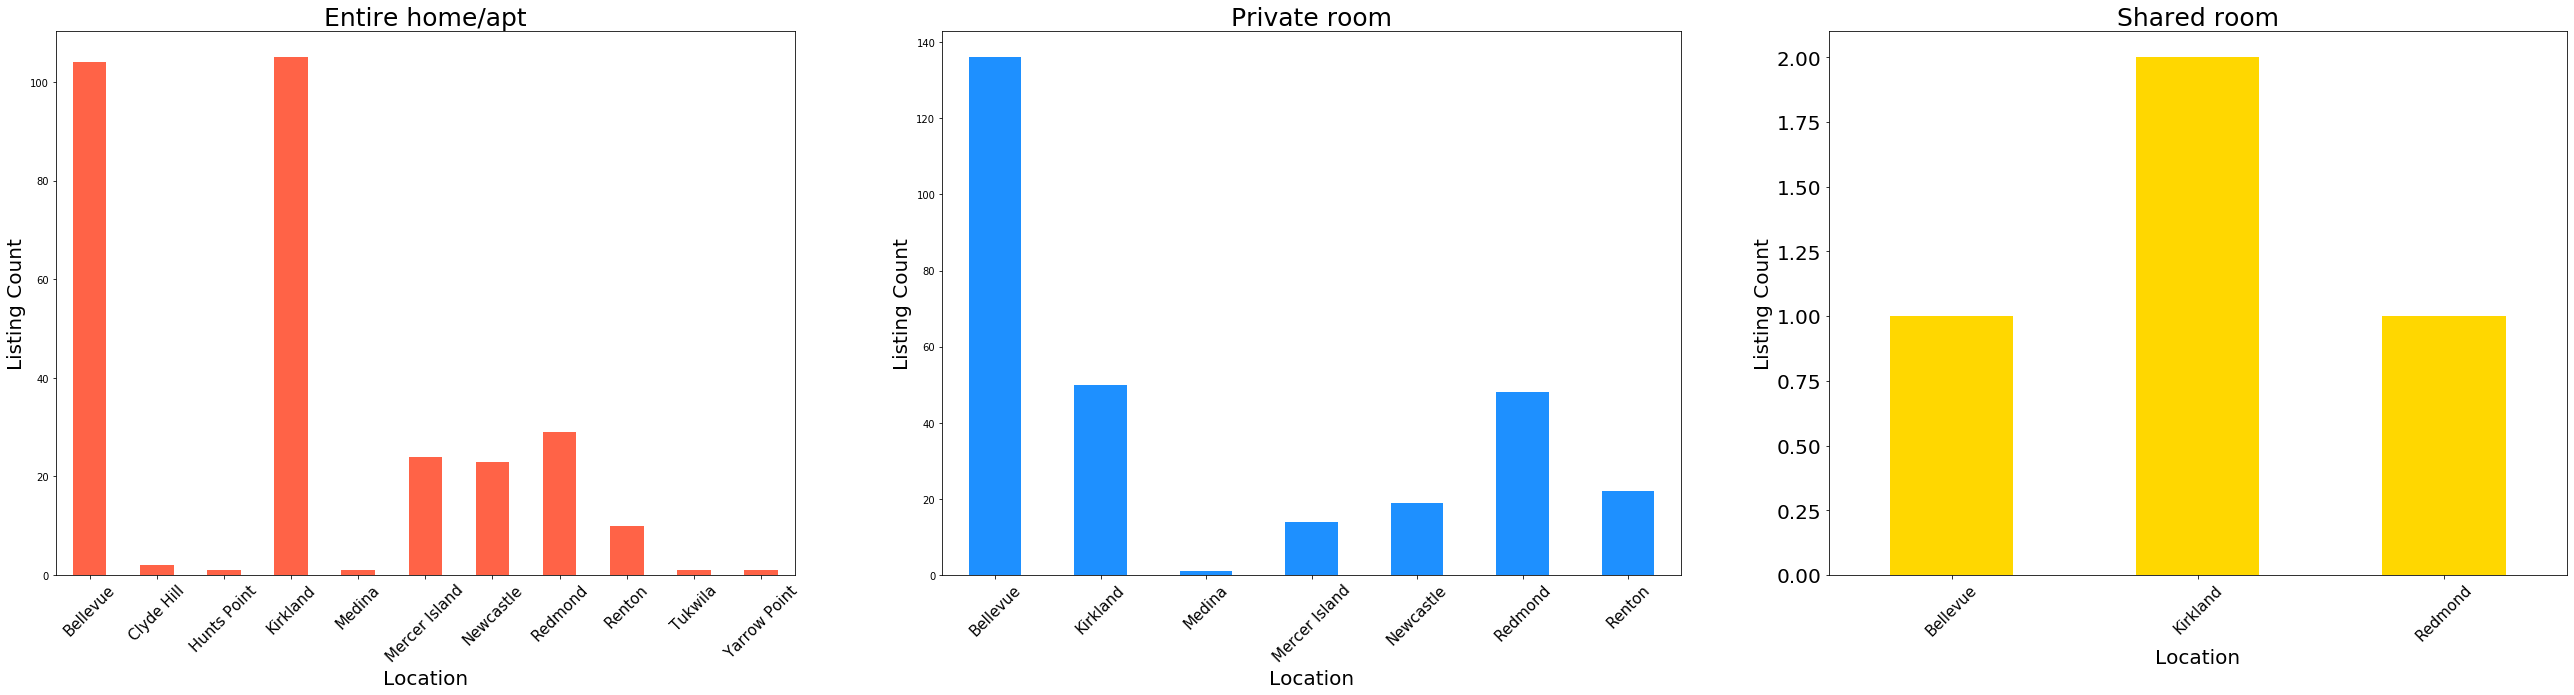

In [17]:
# Without Seattle listing
df_entire_count = df_entire_count[df_entire_count['location'] != 'Seattle, WA, United States']
df_private_count = df_private_count[df_private_count['location'] != 'Seattle, WA, United States']
df_shared_count = df_shared_count[df_shared_count['location'] != 'Seattle, WA, United States']
df_rooms = [df_entire_count, df_private_count, df_shared_count]

plot_3_graphs(df_rooms)

#### 2) Price distribution per location
Show price distribution of listings in cities that has more than 5 listings to see average price of each city.

In [18]:
# Only choose locations with >5 listings
grouped = df.groupby(['location'])
keys = list()
for k,v in grouped:
    if(len(grouped.get_group(k)) > 5): keys.append(k)

loc = ""
for i,l in enumerate(keys): 
    if i+1 != len(keys): loc += "\"" + str(l) + "\", "
    else: loc += "\"" + str(l) + "\""

df_location = pd.read_sql(f'SELECT price, location FROM listings WHERE location IN ({loc}) and price < 750 and price > 0;', conn)

# Remove "WA, US" for labeling purposes
for i,k in enumerate(keys):
    x = len(k)-19
    keys[i] = k[:x]

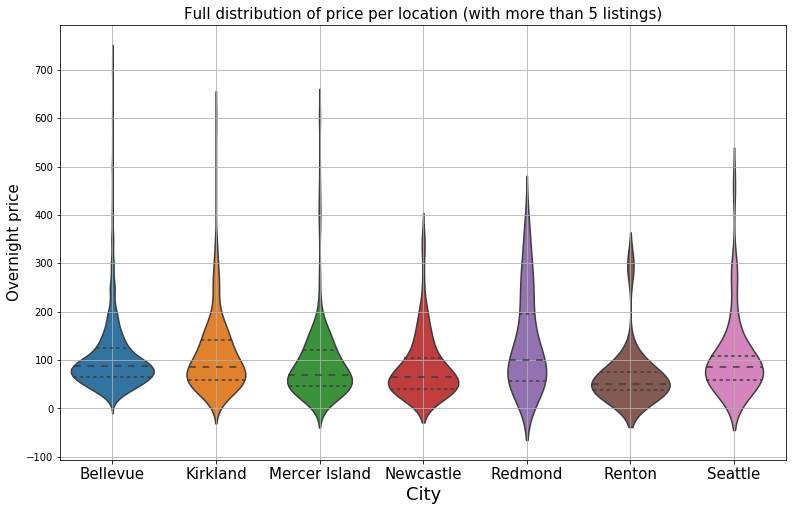

In [19]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x='location', y='price', data=df_location, pallete='muted', inner='quartile')
ax.set_title('Full distribution of price per location (with more than 5 listings)', size=15)
ax.set_xticklabels(keys, size=15)
ax.set_xlabel("City", size=18)
plt.grid()
ax.set_ylabel("Overnight price", size=15)
plt.show()

#### 3) Map of Seattle with prices

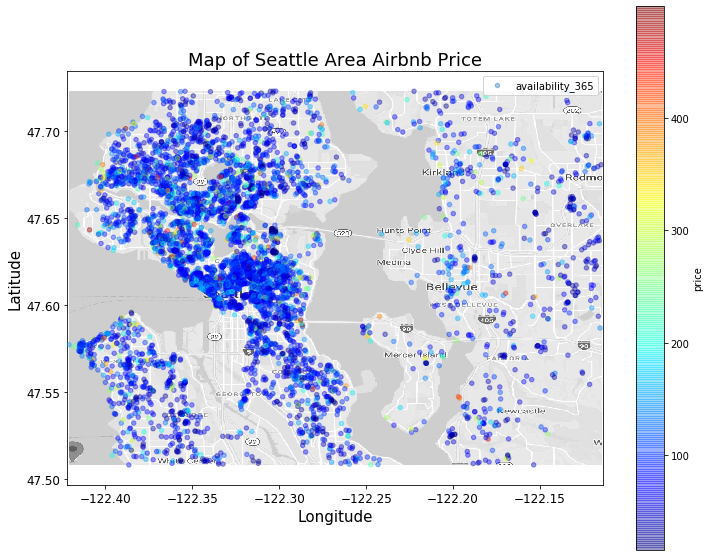

In [20]:
plt.figure(figsize=(12,10))
seattle_map = plt.imread(r'C:\Users\steph\Documents\Projects\TMAC\img.jpg')

# Only show listings with price under 500 for visibility
listings = pd.read_sql('SELECT * FROM listings WHERE price < 500;', conn)
min_la, max_la = listings.latitude.min(), listings.latitude.max()
min_lo, max_lo = listings.longitude.min(), listings.longitude.max()
plt.imshow(seattle_map, zorder=0, extent=[min_lo, max_lo, min_la, max_la])
ax = plt.gca()

listings.plot(ax=ax, figsize=(12,10), kind='scatter', x='longitude', y='latitude', c='price', fontsize=12, label='availability_365', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Map of Seattle Area Airbnb Price', fontsize=18)
plt.legend()
plt.show()

#### 4) Price distribution according to number of people listing can accomodates
How is the relationship between price and number of people that can be accommodated in that listing?

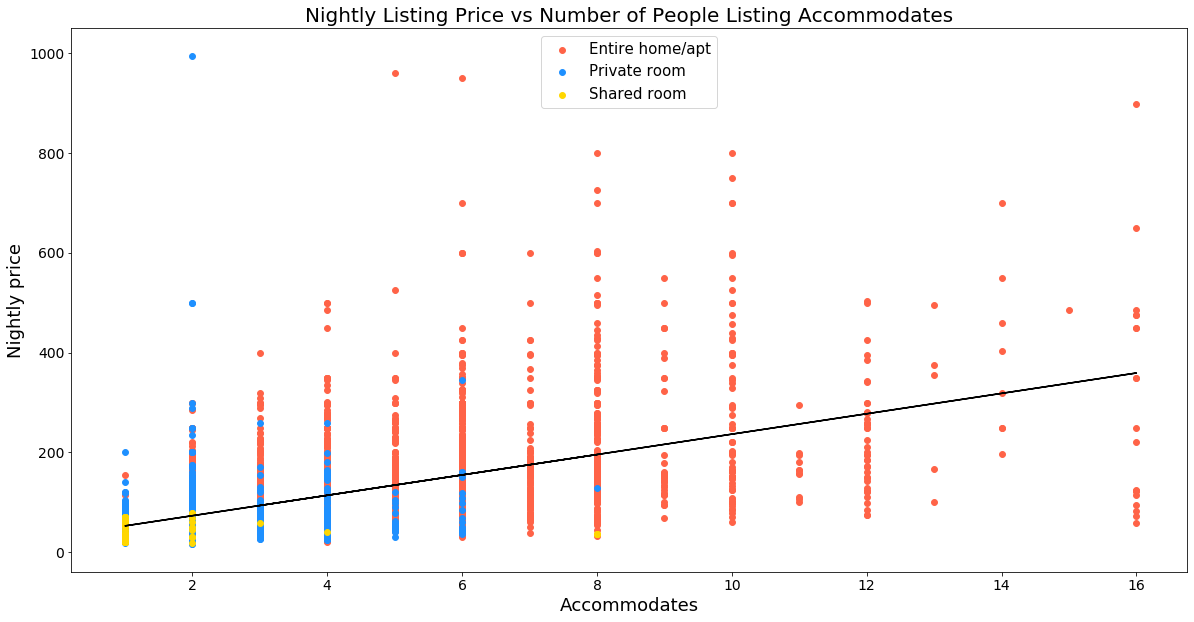

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df_entire['accommodates'], df_entire['price'], color = 'tomato', s=35, label='Entire home/apt')
plt.scatter(df_private['accommodates'], df_private['price'], color = 'dodgerblue', s=35, label='Private room')
plt.scatter(df_shared['accommodates'], df_shared['price'], color = 'gold', s=35, label='Shared room')
m, b = np.polyfit(df['accommodates'], df['price'], 1)

temp_x = []
for i,row in df.iterrows():
    if row['accommodates'] < 20: temp_x.append(row['accommodates'])
temp_x = np.asarray(temp_x)
plt.plot(temp_x, m*temp_x + b, color='black')

plt.title('Nightly Listing Price vs Number of People Listing Accommodates', size=20)
plt.xlabel('Accommodates', size=18)
plt.ylabel('Nightly price', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=0, fontsize=12, prop={'size': 15})
plt.show()

#### 5) Create table of hosts with average ratings
*host* table created to see rating for each host averaged from their listings.

In [22]:
df_host = pd.read_sql('SELECT host_id, rating FROM listings;', conn)
df_host = df_host.groupby('host_id').mean().reset_index()
df_host = df_host.round({'rating' : 2})
df_host.to_sql('host', conn, if_exists='replace', index=False)

In [23]:
pd.read_sql('SELECT * FROM host ORDER BY rating ASC LIMIT 20;', conn)

,host_id,rating
0,2115174,3.0
1,857146,3.5
2,25645421,3.5
3,61891983,3.5
4,67221163,3.5
5,146986667,3.5
6,49798983,3.9
7,4193,4.0
8,91286,4.0
9,107605,4.0


In [24]:
# Find host_id that has the highest rating
top = int(pd.read_sql('SELECT host_id FROM host ORDER BY rating DESC LIMIT 1;', conn).host_id)

# Show listings of top host
pd.read_sql(f'SELECT * FROM listings WHERE host_id = {top};', conn)

,room_id,host_id,room_type,location,reviews,rating,accommodates,bedrooms,bathrooms,price,latitude,longitude,room_name
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,47.610819,-122.290816,"Casa Madrona - Urban Oasis, 1 block from the P..."
1,20137795,2536,Private room,"Seattle, WA, United States",21,5.0,1,1.0,1.0,49,47.609593,-122.290888,Casita Madrona


#### 6) Hosts with most listing in Seattle
Show top 10 host with the most listings and their average ratings.

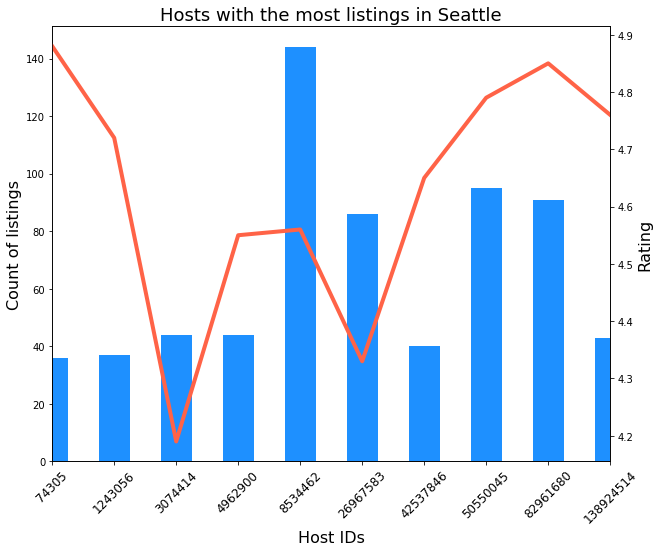

In [25]:
host_count = df.groupby('host_id').count()
host_count.sort_values(by=['room_id'], ascending=False, inplace=True)
top_host = host_count.head(10)
top_host_id = list(top_host.index)
top_host_count = pd.DataFrame({'host_id' : top_host_id, 'count' : list(top_host.room_id)})
top_host_count.sort_values(by='host_id', inplace=True)

top_host_rating = df_host[df_host['host_id'].isin(top_host_id)]
top_host_rating = pd.DataFrame({'host_id' : list(top_host_rating['host_id']), 'rating' : list(top_host_rating['rating'])})

ax1 = top_host_count.plot(x='host_id', kind='bar', figsize=(10,8), legend=False, color='dodgerblue')
ax2 = top_host_rating['rating'].plot(secondary_y=True, color='tomato', linewidth=4)

ax2.set_ylabel('Rating', size=16)
ax1.set_xlabel('Host IDs', size=16)
ax1.set_ylabel('Count of listings', size=16)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=12)
plt.title('Hosts with the most listings in Seattle', size=18)
plt.show()

In [26]:
conn.close()